In [1]:
import csv
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
df = pd.read_csv("../../data/data3size5.csv")
y = df['class']

In [2]:
img_list = []
size = 64
for i in range(len(df)):
    img_list.append(cv2.resize(cv2.imread("../../"+df.PATH[i]),(size,size)))
    
X_train, X_test, y_train, y_test = train_test_split(img_list, y, test_size=0.2,random_state=1)
X_test,X_val,y_test,y_val = train_test_split(X_test, y_test, test_size=0.5,random_state=1)

In [3]:
from tensorflow.keras.utils import to_categorical
X_train,X_val,X_test = np.array(X_train)/255.,np.array(X_val)/255.,np.array(X_test)/255.
y_train,y_val,y_test =  to_categorical((np.array(y_train)),3),to_categorical((np.array(y_val)),3),to_categorical((np.array(y_test)),3)

In [4]:
#モデルの設定
from tensorflow.keras import layers,models,initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
import sys

model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(size, size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 4)         112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 8)         296       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 32)          4

In [5]:
from tensorflow.python.keras.callbacks import TensorBoard

model.compile(
   optimizer = 'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

#tsb = TensorBoard(log_dir='./logs')
history = model.fit(X_train, y_train,
          batch_size=128,
          epochs=20,
          validation_data=(X_val,y_val))

Epoch 1/20
591/591 [==============================] - 17s 28ms/step - loss: 0.8346 - accuracy: 0.6364 - val_loss: 0.7068 - val_accuracy: 0.7227
Epoch 2/20
591/591 [==============================] - 14s 24ms/step - loss: 0.7026 - accuracy: 0.7195 - val_loss: 0.6630 - val_accuracy: 0.7298
Epoch 3/20
591/591 [==============================] - 14s 24ms/step - loss: 0.6591 - accuracy: 0.7308 - val_loss: 0.6285 - val_accuracy: 0.7452
Epoch 4/20
591/591 [==============================] - 14s 24ms/step - loss: 0.6288 - accuracy: 0.7410 - val_loss: 0.6377 - val_accuracy: 0.7311
Epoch 5/20
591/591 [==============================] - 15s 25ms/step - loss: 0.6090 - accuracy: 0.7472 - val_loss: 0.5846 - val_accuracy: 0.7601
Epoch 6/20
591/591 [==============================] - 14s 24ms/step - loss: 0.5885 - accuracy: 0.7542 - val_loss: 0.5684 - val_accuracy: 0.7664
Epoch 7/20
591/591 [==============================] - 14s 24ms/step - loss: 0.5769 - accuracy: 0.7605 - val_loss: 0.5631 - val_accuracy:

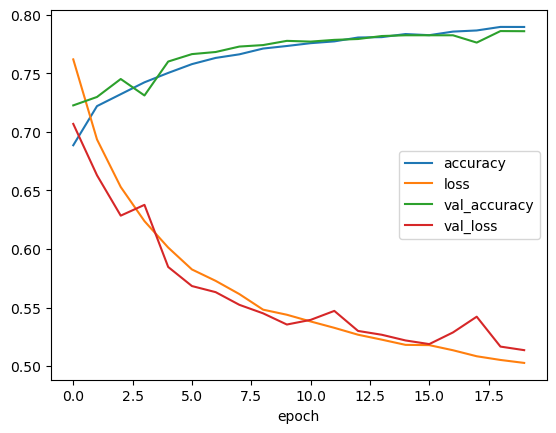

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history["accuracy"], label="accuracy")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.plot(history.epoch, history.history["val_accuracy"], label="val_accuracy")
plt.plot(history.epoch, history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [7]:
print(type(history))
score = model.evaluate(X_test, y_test, verbose=0,batch_size=128)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

<class 'tensorflow.python.keras.callbacks.History'>
Test loss: 0.5225616693496704
Test accuracy: 0.7778483033180237


In [8]:
pd.DataFrame(history.history["loss"])

,0
0,0.719230
1,0.590382
2,0.522046
3,0.496162
4,0.479375
5,0.463055
6,0.451433
7,0.437963
8,0.422335
9,0.403748
